In [ ]:
1.take a imbalnced data
2.Data preprocessing
3.train the model using KNN
4.evaluation metrics
5.Handle the imbalanced data using SMOTE techinque(data preprocesing)
6.Again train the model using KNN
7.find evaluation metrics ater handling

1.importing all the necessary **libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2.import dataset

In [3]:
df=pd.read_csv("car_evaluation.csv")

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [6]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

In [7]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.989583
std,1.118358,1.627039
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,6.000000
max,5.000000,6.000000


In [8]:
df.shape

(1728, 7)

In [9]:
3.#Handle null
df.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
outcome     False
dtype: bool

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [12]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

4.Data visualiation

<ipython-input-14-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

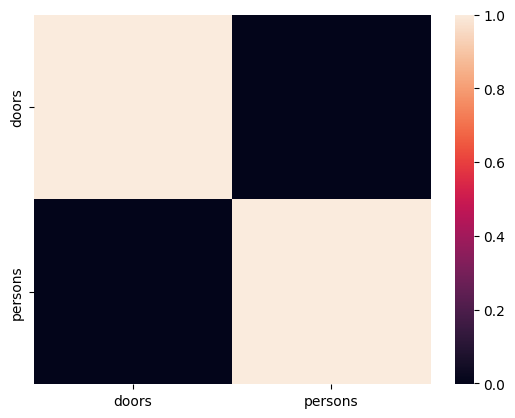

In [14]:
sns.heatmap(df.corr())

<Axes: ylabel='outcome'>

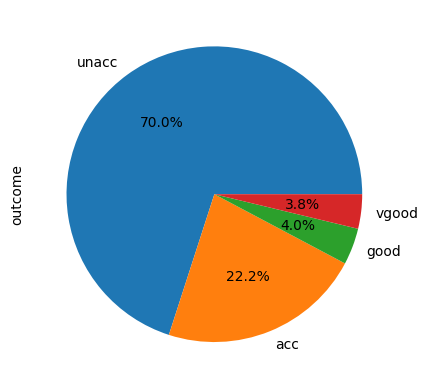

In [16]:
df.outcome.value_counts().plot(kind="pie",autopct="%1.1f%%")

In [17]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


5.Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
columns=["buying","maint","lug_boot","safety"]
df[columns]=df[columns].apply(le.fit_transform)

In [20]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


6.splitting dependent and independent varaibles

In [22]:
x=df.drop(columns="outcome")
y=df["outcome"]

In [23]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [24]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object

7.train test split

In [28]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

MOdel Building

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred=knn.predict(x_test)

In [35]:
y_pred

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'good', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'good',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'vgood', 'acc',
    

In [33]:
y_test

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
        ...  
1481    vgood
1327    unacc
317       acc
142     unacc
427       acc
Name: outcome, Length: 346, dtype: object

In [36]:
knn.predict([[3,3,2,2,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

In [37]:
knn.predict([[1,1,5,6,0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['good'], dtype=object)

In [ ]:
Evaluation

In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
accuracy_score(y_pred,y_test)

0.9075144508670521

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.80      0.81      0.81        79
        good       0.62      0.29      0.40        17
       unacc       0.95      0.98      0.97       240
       vgood       0.90      0.90      0.90        10

    accuracy                           0.91       346
   macro avg       0.82      0.75      0.77       346
weighted avg       0.90      0.91      0.90       346



In [41]:
pd.crosstab(y_test,y_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,3,11,1
good,11,5,1,0
unacc,4,0,236,0
vgood,1,0,0,9


**Handle the imbalnced data and build our model**

In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [43]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [44]:
y_train.value_counts()

unacc    970
acc      305
vgood     55
good      52
Name: outcome, dtype: int64

In [45]:
y_train_smote.value_counts()

unacc    970
acc      970
good     970
vgood    970
Name: outcome, dtype: int64

MOdel Building on balalnced dataset

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_smote=KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [48]:
y_pred1=knn_smote.predict(x_test)

In [49]:
accuracy_score(y_pred1,y_test)

0.8265895953757225

In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         acc       0.60      0.81      0.69        79
        good       0.61      0.65      0.63        17
       unacc       0.96      0.85      0.91       240
       vgood       0.67      0.60      0.63        10

    accuracy                           0.83       346
   macro avg       0.71      0.73      0.71       346
weighted avg       0.85      0.83      0.83       346



In [52]:
pd.crosstab(y_test,y_pred1)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,6,7,2
good,5,11,1,0
unacc,33,1,205,1
vgood,4,0,0,6
